## Unsupervised Learning

In [2]:
## Source: https://www.youtube.com/watch?v=UhVn2WrzMnI

## Types of Unsupervised learning
## 1.) Classification
## 2.) Association
## 3.) Dimensionality Reduction

## ------------------------------------

## 1.) Classification

## K-Means Clustering

## A method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


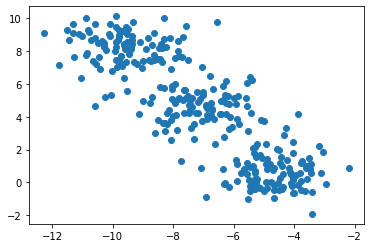

In [3]:
from matplotlib import pyplot as plt #Importing the plotting function of matplotlib
from sklearn.cluster import KMeans #Importing KMeans from Scikit Learn
from sklearn.datasets.samples_generator import make_blobs #Generating random data from scikit learn

x,y=make_blobs(n_samples=300, cluster_std=1.00,random_state=12) 
plt.scatter(x[:,0],x[:,1])
plt.show()

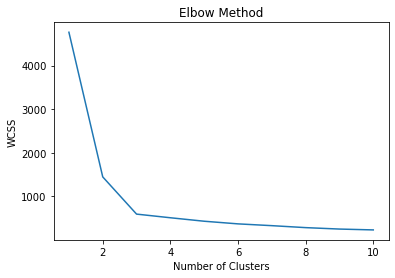

In [4]:
wcss=[] #Within Clusters Sum of Squares Sum of the squared distance between each member of the cluster and its centroid
for i in range (1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

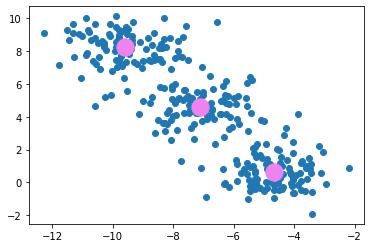

In [5]:
kmeans=KMeans(n_clusters=3) #3 here is the number of blob
pred_y=kmeans.fit_predict(x) #Coordinate point of the centroid
plt.scatter(x[:,0],x[:,1],cmap='viridis') #Viridis=Colormap
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='violet') #300 is the size of the violet blob
plt.show()

## KNN

## K-nearest neighbors algorithm (k-NN) is a non-parametric classification method used for classification and regression. In both cases, the input consists of the k closest training examples in a data set. The output depends on whether k-NN is used for classification or regression

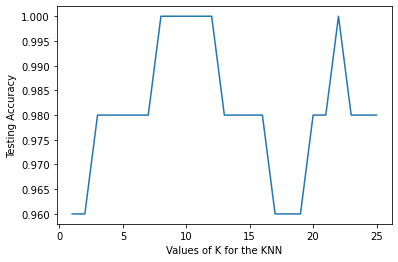

In [6]:
from sklearn.datasets import load_iris #Importing iris from scikit learn datasets. 
                                       #Iris Dataset is a part of sklearn library.
                                       #Iris has 4 numerical features and a tri class target variable. 
                                       #This dataset can be used for classification as well as clustering.
                                       #Data Scientists say iris is 'hello world' of machine learning.
from sklearn.model_selection import train_test_split #Function for splitting data arrays into two subsets: training & testing data.
from sklearn.neighbors import KNeighborsClassifier #By default, the KNeighborsClassifier looks for the 5 nearest neighbors. 
from sklearn import metrics #Metrics module implements several loss, score, & utility functions to measure classification performance.
import matplotlib.pyplot as plt

iris=load_iris()
x=iris.data
y=iris.target

xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.33,random_state=24)
scores={}
scores_list=[]
krange=range(1,26)
for k in krange:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    ypred=knn.predict(xtest)
    scores[k]=metrics.accuracy_score(ytest, ypred)
    scores_list.append(metrics.accuracy_score(ytest, ypred))
plt.plot(krange, scores_list)
plt.xlabel('Values of K for the KNN')
plt.ylabel('Testing Accuracy')
plt.show()

#Output graph shows that around 9-12 and 23 are the most accurate values of K for the KNN

## Hierarchical

## Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

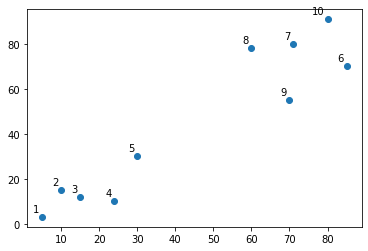

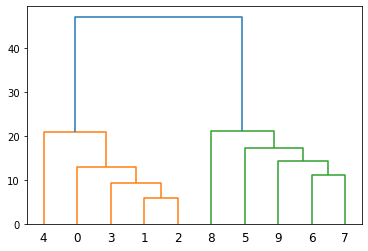

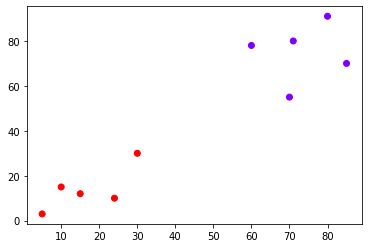

In [7]:
import numpy as np #Library for the Python programming language, adding support for large, multi-dimensional arrays 
                   #and matrices, along with a large collection of high-level mathematical functions to operate on 
                   #these arrays.
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage #Used for scientific computing and technical computing.
from sklearn.cluster import AgglomerativeClustering #Agglomerative clustering is the most common type of hierarchical 
                                                    #clustering used to group objects in clusters based on their similarity.
X=np.array([[5,3], #Data points
           [10,15],
           [15,12],
           [24,10],
           [30,30],
           [85,70],
           [71,80],
           [60,78],
           [70,55],
           [80,91],])
labels=range(1,11) #Labels of data points
plt.scatter(X[:,0],X[:,1],label='True Position') #Plotting of points
for label, x,y in zip(labels, X[:,0],X[:,1]):
    plt.annotate(label,xy=(x,y), xytext=(-3,3),textcoords='offset points',ha='right',va='bottom')
    
plt.show() #Showing of the scatter plot

linked=linkage(X,"single")
labelList=range(1,11)
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=True) #Dendrogram is to show the hierarchial graph

plt.show()

cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean", linkage="ward") #Agglometric clustering is used to tell how the clustering is going to happen
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=cluster.labels_, cmap="rainbow") #cmap is colormap
plt.show()

## 2.) Association

## Apriori

## Algorithm that is used in mining frequent products sets and relevant association rules.
## Generally, the apriori algorithm operates on a database containing a huge number of transactions. 

In [ ]:
#Source: https://www.youtube.com/watch?v=UhVn2WrzMnI

In [1]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd #Will used pands since we will be working with csv file
from apyori import apriori #Apyori is a simple implementation of Apriori algorithm with Python 2.7 and 3.3

store_data=pd.read_csv('store_data.csv',header=None)

records=[]
for i in range(0,7501):
    records.append([str(store_data.values[i,j])for j in range(0,20)])
association_rules=apriori(records,min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results=list(association_rules)

for item in association_results:
    pair=item[0]
    items=[x for x in pair]
    print("Rule: "+items[0]+"->"+items[1])
    print("Support: "+str(item[1]))
    print("Confidence: "+str(item[2][0][2]))
    print("Lift: "+str(item[2][0][3]))
    print("========================")

IndexError: index 15 is out of bounds for axis 1 with size 15

In [ ]:
#Waiting for edureka's reply on the file thru email.

## FP-Growth

## FP growth algorithm represents the database in the form of a tree called a frequent pattern tree or FP tree. This tree structure will maintain the association between the itemsets. ... The itemsets of these fragmented patterns are analyzed. Thus with this method, the search for frequent itemsets is reduced comparatively

In [ ]:
#Source: https://www.youtube.com/watch?v=flmTELH7rmg

In [3]:
pip install pyfpgrowth

     |████████████████████████████████| 1.6 MB 124 kB/s eta 0:00:01
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5479 sha256=b0a1e7500505bfd2e5fa868af31d37c436825e128fed1883aae86fe0d9cf4664
  Stored in directory: /Users/ranielbartetaripe/Library/Caches/pip/wheels/29/e2/a7/ccb34c35e2c6737d3f09b53784f4323b7ff556a5f02096c70d
Successfully built pyfpgrowth
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import pyfpgrowth

transaction=[[1,2,5],
             [2,4],
             [2,3],
             [1,2,4],
             [1,3],
             [2,3],
             [1,3],
             [1,2,3,5],
             [1,2,3]]

dataset=pd.read_csv('/Users/ranielbartetaripe/MSFE/PUP-Jerome-MSCpE/Intelligent Systems and Robotics/OnlineRetail.csv',header=None)
transactions=[]
for sublist in dataset.values.tolist():
    clean_sublist=[item for item in sublist if item is not np.nan]
    transactions.append(clean_sublist)

patterns=pyfpgrowth.find_frequent_patterns(transactions,2)

rules=pyfpgrowth.generate_association_rules(patterns,0.7)

print(dataset)
print(transactions)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 28: invalid start byte

## 3.) Dimensionality Reduction

## Techniques that reduce the number of input variables in a dataset. More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality.

## 1.) Feature Selection
## -Missing Value Ratio
## -Low Variance Filter
## -High Correlation Filter
## -Random Forest
## -Backward Feature Extraction
## -Forward Feature Extraction

## 2.) Dimensionality Reduction
## 2A.) Components/Factors Based
## -Factor Analysis
## -Principal Component Analysis
## -Independent Component Analysis

## 2B.) Projection Based
## -ISOMAP
## -t-SNE
## -UMAP

In [16]:
import urllib.request
from PIL import Image
urllib.request.urlretrieve(
    'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2018%2F08%2Fdimensionality-reduction-techniques-python%2F&psig=AOvVaw0eA48qz-pYys4khp-CXoU4&ust=1638171172405000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCLCLrqrFuvQCFQAAAAAdAAAAABAD',
    "dr.png")

img=Image.open("dr.png")
img.show()

UnidentifiedImageError: cannot identify image file 'dr.png'

## Random Forest
## Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

In [15]:
#Source: https://www.youtube.com/watch?v=7AuL8C6mIdg

#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import the height and age dataset

data=pd.read_csv('/Users/ranielbartetaripe/MSFE/PUP-Jerome-MSCpE/Intelligent Systems and Robotics/Height_Age_Dataset.csv')
data.head() #To get the first row of your dataset

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [16]:
#Store the data in the form of dependent and independent variables separately
X=data.iloc[:,0:1].values #Age
y=data.iloc[:,1].values #Height

In [17]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
#Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Regressor object from Random Forest Regressor class
RFReg=RandomForestRegressor(n_estimators=10,random_state=0)

#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [19]:
#Predicted Height from test dataset w.r.t Random Forest Regression
y_predict_rfr=RFReg.predict((X_test))

#Model Evaluation using R-square for Random Forest Regression
from sklearn import metrics
r_square=metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is: '+str(r_square))

R-Square Error associated with Random Forest Regression is: 0.7299999999999965


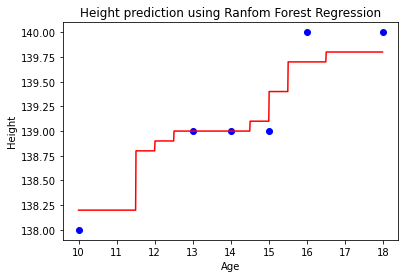

<Figure size 72x72 with 0 Axes>

In [14]:
#Visualise the Random Forest Regression by creating range of values from min value of X_train to
#max value of X_train having a difference of 0.01 between two consecutive values

X_val=np.arange(min(X_train), max(X_train), 0.01)

#Reshape the data into a len(X_val)*1 array in order to make a column out of X_val values
X_val=X_val.reshape((len(X_val),1))

#Define a scatter plot for training data
plt.scatter(X_train, y_train, color='blue')

#Plot the predicted data
plt.plot(X_val, RFReg.predict(X_val), color='red')

#Define the title
plt.title('Height prediction using Ranfom Forest Regression')

#Define X axis label
plt.xlabel('Age')

#Define Y axis label
plt.ylabel('Height')

#Set the size of the plot for better clarity
plt.figure(figsize=(1,1))

#Draw the plot
plt.show()

In [20]:
#Predicting Height based on Age using Decision Tree Regression
height_pred=RFReg.predict([[41]])
print('Predicted Height: '+str(height_pred))

Predicted Height: [139.8]


## Principal Component Analysis (PCA)
## A statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

## A dimensionality reduction technique that enables you to identify correlations and patterns in a data set so that it can be transformed into a data set of significantly lower dimension without loss of any important function

In [ ]:
#Source: https://www.youtube.com/watch?v=QdBy02ExhGI

In [21]:
#Load Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [22]:
from sklearn.datasets import load_breast_cancer

In [23]:
cancer=load_breast_cancer()

In [24]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [31]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler() #StandardScaler performs the standardization task using the z-score formula with SD=1 and mean=0
scaler.fit(df)

StandardScaler()

In [34]:
scaled_data=scaler.transform(df)

In [35]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [41]:
#Apply now the PCA technique

from sklearn.decomposition import PCA #PCA is under decomposition library

pca=PCA(n_components=2)

In [42]:
pca.fit(scaled_data)

PCA(n_components=2)

In [43]:
x_pca=pca.transform(scaled_data)

In [44]:
scaled_data.shape

(569, 30)

In [45]:
x_pca.shape

(569, 2)

In [46]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [47]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second Principle Component')

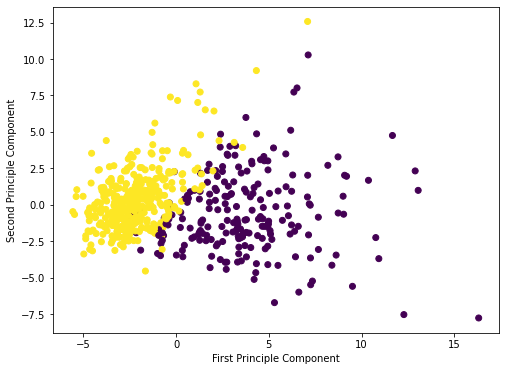

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

## Isomap
## Isomap is a nonlinear dimensionality reduction method. It is one of several widely used low-dimensional embedding methods. Isomap is used for computing a quasi-isometric, low-dimensional embedding of a set of high-dimensional data points.

In [57]:
#Source: https://www.youtube.com/watch?v=GfnBicvVxwA

In [50]:
import numpy as np
import pandas as pd
from sklearn.utils import resample 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn.datasets import load_digits 
from sklearn import manifold

In [52]:
digits=load_digits() #load_digits. Recognizing hand-written digits. Feature agglomeration. Various Agglomerative Clustering on a 2D embedding of digits.
digits.images.shape

(1797, 8, 8)

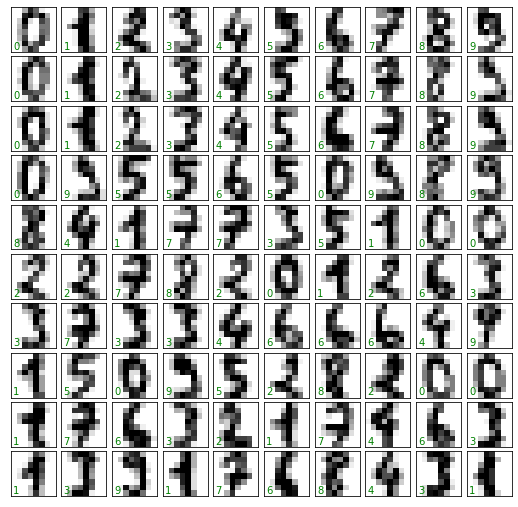

In [53]:
fig, ax=plt.subplots(10,10,figsize=(9,9),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i, axes in enumerate(ax.flat):
    axes.imshow(digits.images[i],cmap='binary') #binary cmap means, black and white. cmap=colored map
    axes.text(0.05,0.05,str(digits.target[i]),transform=axes.transAxes,color='green')


In [54]:
data_x=digits.data
data_y=digits.target

In [55]:
model=manifold.Isomap(n_components=2).fit_transform(data_x)

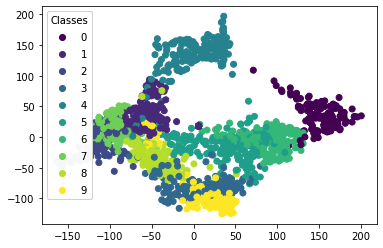

In [56]:
fig, ax=plt.subplots()

scatter=ax.scatter(model[:,0],model[:,1],c=data_y, )
#Produc a legend with the unique color from the scatter
legend1=ax.legend(*scatter.legend_elements(),loc="upper left",title="Classes")
ax.add_artist(legend1)

## Applications of Unsupervised Learning
## 1. Recognize patterns to cluster data
## 2. Defects in the data collected
## 3. Identify dependencies
## 4. Cleansing the datasets by removing unwanted features

## Disadvantages of Unsupervised Learning
## 1. You may never know the method of how the data was sorted by algorithm
## 2. It provides less accurate outputs
## 3. Output obtained may not be what the user was expecting due to data interpretation mismatch
## 4. Output obtained has to be understood by user and mapped with corresponding labels

## K-Means Clustering (lecture from Quantinsti)

## -type of unsupervised machine learning that groups data on the basis of similarities.
## Difference of K-Means versus other clustering methods is that K-Means have predetermined amount of clusters. It then calculates the centroids or mean of these points.

## In trading, one of the applications of K-means is on statistical arbitrage. Statistical Arbitrage premise is that despite 2 securities being random walks, their relationship is not random, thus yielding a trading opportunity.

In [2]:
#Importing necesarry libraries
#Data analysis and manipulation libraries
import numpy as np
import pandas as pd

#Visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning libraries
#the below line is far making fake data for illustration puporses
from sklearn.datasets import make_blobs

In [3]:
#Creating fake data
data=make_blobs(n_samples=500, n_features=8, centers=5, cluster_std=1.5, random_state=201) #make_blobs objects allows us create and secify parameters associated with the data we're going to create.
                                                                                           #cluster_std is standard deviation

In [4]:
#Let's take a look at our fake data
data[0] #Produces an array of our samples

array([[-8.71704845,  5.41481685,  0.80079153, ..., -6.75272811,
        -5.35441615, -7.54472844],
       [-6.69742504, -9.36091046,  4.76952742, ...,  4.50267649,
        -8.65187746,  7.32045219],
       [-8.24498976,  3.41616552,  0.59957377, ..., -6.06843425,
        -5.44945023, -7.63414447],
       ...,
       [-6.39216053, -3.36795039, 10.45021989, ..., -1.04434723,
        -5.1316052 ,  3.76141109],
       [ 6.00389682,  6.66533498, -3.59987442, ..., -1.64244834,
         6.9089689 , -4.24161932],
       [10.55759534,  5.59483822, -4.07524866, ..., -1.38497719,
         8.43095575, -1.08873693]])

In [5]:
#Viewing the clusters of our data
data[1]

array([0, 1, 0, 2, 2, 3, 0, 4, 3, 3, 4, 3, 1, 2, 3, 0, 4, 4, 2, 4, 2, 1,
       4, 1, 2, 1, 2, 1, 4, 2, 1, 4, 0, 4, 2, 3, 4, 1, 0, 0, 3, 3, 1, 2,
       4, 2, 4, 3, 1, 3, 1, 4, 0, 3, 3, 0, 2, 1, 3, 2, 0, 3, 0, 3, 4, 4,
       2, 2, 4, 3, 0, 0, 1, 4, 3, 4, 1, 3, 4, 3, 2, 0, 4, 1, 0, 4, 0, 4,
       4, 2, 3, 4, 1, 4, 0, 3, 0, 4, 3, 2, 4, 2, 1, 3, 0, 2, 2, 0, 2, 2,
       2, 1, 4, 4, 4, 2, 2, 0, 2, 0, 4, 2, 1, 0, 3, 0, 2, 2, 3, 2, 0, 1,
       2, 1, 0, 2, 1, 0, 3, 2, 1, 1, 0, 1, 0, 3, 0, 0, 3, 2, 2, 4, 2, 4,
       1, 2, 1, 2, 4, 1, 1, 4, 3, 0, 0, 1, 1, 0, 4, 1, 2, 1, 4, 4, 3, 4,
       1, 0, 1, 1, 1, 1, 0, 4, 4, 4, 1, 0, 4, 3, 4, 2, 2, 4, 3, 3, 1, 3,
       0, 3, 0, 0, 4, 1, 4, 3, 3, 0, 4, 0, 3, 2, 0, 4, 3, 4, 1, 2, 4, 1,
       4, 1, 3, 3, 4, 2, 3, 2, 2, 3, 1, 4, 1, 1, 0, 3, 2, 4, 0, 4, 0, 0,
       0, 4, 2, 4, 2, 0, 1, 0, 1, 3, 4, 4, 4, 3, 1, 4, 1, 4, 2, 4, 3, 0,
       1, 3, 1, 3, 0, 0, 2, 3, 0, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 2, 0, 3,
       2, 4, 1, 2, 0, 0, 1, 3, 4, 0, 1, 4, 3, 3, 0,

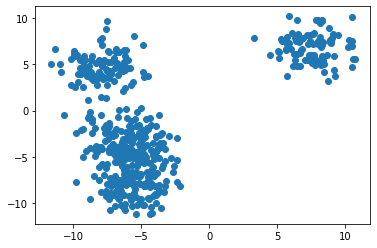

In [7]:
#Creating a scatter plot of our data in features 1 and 2
plt.scatter(data[0][:,0],data[0][:,1])

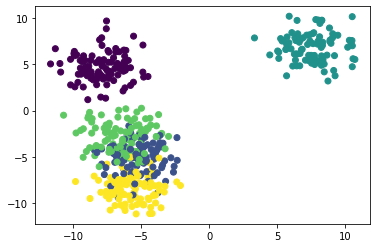

In [8]:
#The above plot doesn't give us much information 
#Let's recreate it using our clusters
plt.scatter(data[0][:,0],data[0][:,1],c=data[1])

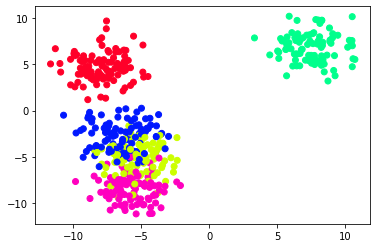

In [9]:
#We can improve the data visualization by adding a colormap in our plot
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='gist_rainbow')

In [10]:
#Importing K-Means
from sklearn.cluster import KMeans

In [12]:
#Instantiating K-Means
model=KMeans(n_clusters=5) #We know already the number of clusters which is 5, because we created this a while ago
KMeans(algorithm='auto',copy_x=True,init='k-means++',max_iter=300,n_clusters=5,n_init=10,n_jobs=1,precompute_distances='auto',random_state=None,tol=0.0001,verbose=0)

KMeans(n_clusters=5, n_jobs=1, precompute_distances='auto')

AttributeError: 'KMeans' object has no attribute 'labels_'

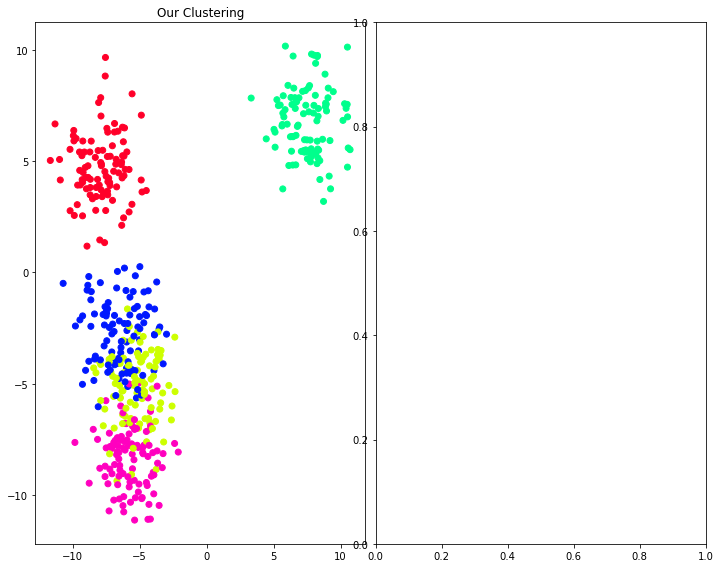

In [16]:
#Now we can compare our clustered data to that of K-Means
#Creating subplots
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='gist_rainbow')

#In the above lone of code, we are simply replotting our clustered data 
#Based on already knowing the labels (i.e. c=data[1])
plt.title('Our Clustering')
plt.tight_layout()
plt.subplot(122)
plt.scatter(data[0][:,0],data[0][:,1],c=model.labels_,cmap='gist_rainbow')

#Notice that the above line of code differes from the first, this means that we will be plotting this second plot based on the clusters that our model predicted.

plt.title('K-Means Clustering')
plt.tight_layout()
plt.show()

In [ ]:
#May error pa sa taas, next mo na dyan ung title sa baba.

## building a StatArb Strategy Using K-Means